# Understanding and Importing Libraries

In [227]:
#import warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("always")

In [228]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [229]:
# to display all the columns 
pd.set_option('display.max_columns',None)
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [230]:
#check shape
leads.shape

(9240, 37)

In [231]:
#check types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [232]:
#check all the columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [233]:
#checking Lead Number is unique
leads["Lead Number"].is_unique

True

In [234]:
#check Prospect_ID is unique
leads["Prospect ID"].is_unique

True

As Both are unique we have decided to drop "Prospect ID" because of its readability.

# Data Cleaning

In [235]:
#check for null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [236]:
#percentage of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Specialization

In [237]:
#checking values for 
leads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [238]:
#converting 'Select' in np.nan because it is equivalent to null values
leads['Specialization']=leads['Specialization'].replace({'Select': np.nan})

#### How did you hear about X Education

In [239]:
#counting values of this categorical column
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [240]:
#convert select into np.nan
leads['How did you hear about X Education']=leads['How did you hear about X Education'].replace({'Select': np.nan})

#### What is your current occupation

In [241]:
# counting values
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### What matters most to you in choosing a course

In [242]:
# counting values of this categorical column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

here we do no have any Select field.

#### Lead Profile

In [243]:
# counting value of this categorical column
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

This is having 'Select ' field so need to convert into np.nan

In [244]:
#convert Lead profile "select" field into np.nan
leads['Lead Profile']=leads['Lead Profile'].replace({'Select': np.nan})

#### City

In [245]:
#converting "select" into np.nan.
leads['City']=leads['City'].replace({'Select': np.nan})

#### Country

In [246]:
# counting values of "Country" column
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Kuwait                     4
Nigeria                    4
Canada                     4
Sweden                     3
Netherlands                2
Philippines                2
Italy                      2
China                      2
Bangladesh                 2
Uganda                     2
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Vietnam                    1
Kenya                      1
Russia                     1
Indonesia                  1
Sri Lanka                  1
Malaysia                   1
Liberia       

#### Last Notable Activity

In [247]:
# count values of "Last Notable Activity" in percentage
leads['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
Email Received                  0.000108
Approached upfront              0.000108
View in browser link Clicked    0.000108
Name: Last Notable Activity, dtype: float64

This column doesn't have any "select" field

Now we can see actual number of null values including "Select" field

In [248]:
#Finding null percentage including "select" fields
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Now we have some score variables that we can see from data dictionary , that it filled by sales team, so we have decided to drop
them and also the columns having high percentage of missing values that is > 40-45%

In [249]:
#Dropping columns
leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Score','Lead Profile','Lead Quality','Tags',
                  'How did you hear about X Education','Last Notable Activity'],axis=1,inplace=True)
print("Sucessfully Dropped")

Sucessfully Dropped


In [250]:
#checking the shape again
leads.shape

(9240, 28)

In [251]:
#dropping rows having all null values
leads=leads.dropna(axis=0,how='all')

In [252]:
#again checking shape
leads.shape

(9240, 28)

In [253]:
#checking percentage of missing values after dropping many columns
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Do Not Email

In [254]:
leads['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

we see that this column is highly skewed

#### Do Not Call

In [255]:
leads['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

This column is highly skewed.

#### Search

In [256]:
leads['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

This column is highly skewed.

#### Magazine

In [257]:
leads['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

#### Newspaper Article

In [258]:
leads['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

#### X Education Forums

In [259]:
leads['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

#### Newspaper

In [260]:
leads['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

#### Digital Advertisement

In [261]:
leads['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

#### Through Recommendations

In [262]:
leads['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

#### 'Receive More Updates About Our Courses

In [263]:
leads['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

#### Update me on Supply Chain Content

In [264]:
leads['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

#### Get updates on DM Content

In [265]:
leads['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

#### I agree to pay the amount through cheque

In [266]:
leads['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

#### What matters most to you in choosing a course

In [267]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

We saw that all these categorical columns are highly skewed. We are not going to get any insights from it so we decide to drop them.

In [268]:
# Dropping all skewed columns
leads.drop(['Prospect ID','Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content',
                  'I agree to pay the amount through cheque','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("successfully dropped")

successfully dropped


In [269]:
#checking shape
leads.shape

(9240, 12)

#### Now we need to change the np. nan into "other" so as to remove the null values from columns having less percentage of missing values to impute them.

#### Specialization

In [270]:
#checking counts of "specialization"
leads['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [271]:
# assigning "other" to all the null values
leads.loc[pd.isnull(leads['Specialization']),['Specialization']]='Other'

In [272]:
# checking counts of specialization after adding "other"
leads['Specialization'].value_counts(normalize=True)

Other                                0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [273]:
#null count check for "specialization"
leads['Specialization'].isnull().sum()

0

In [274]:
#null percentage of variables
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

#### What is your current occupation

In [275]:
# checking value counts of "What is your current occupation"
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [276]:
# assigning "other" to null values
leads.loc[pd.isnull(leads['What is your current occupation']),['What is your current occupation']]='Other'

In [277]:
#checking null after imputing
leads['What is your current occupation'].isnull().sum()

0

In [278]:
#checking value counts of "What is your current occupation".
leads['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [279]:
#checking null percentage after imputing
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation            0.00
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

#### Lead Source

In [280]:
# checking value counts of "Lead Source"
leads['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Social Media         0.000217
Press_Release        0.000217
Live Chat            0.000217
NC_EDM               0.000109
testone              0.000109
blog                 0.000109
Pay per Click Ads    0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
Name: Lead Source, dtype: float64

In [281]:
# here we decide to impute the missing values with mode because it is very less in percentage
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0],inplace=True)

In [282]:
# checking null counts after imputing
leads['Lead Source'].isnull().sum()

0

In [283]:
#checking null percentge after imputing
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation            0.00
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

#### TotalVisits

In [284]:
# Checking  value counts of "TotalVisits"
leads['TotalVisits'].value_counts(normalize=True)

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
23.0     0.000659
21.0     0.000659
27.0     0.000549
24.0     0.000549
25.0     0.000549
22.0     0.000330
28.0     0.000220
29.0     0.000220
26.0     0.000220
251.0    0.000110
74.0     0.000110
30.0     0.000110
141.0    0.000110
54.0     0.000110
41.0     0.000110
115.0    0.000110
43.0     0.000110
42.0     0.000110
32.0     0.000110
55.0     0.000110
Name: TotalVisits, dtype: float64

In [285]:
# imputing missing values with mode
leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0],inplace=True)

In [286]:
#checking null values after imputing
leads['TotalVisits'].isnull().sum()

0

In [287]:
# null percentage
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation            0.00
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

#### Page Views Per Visit

In [288]:
# checking value counts "Page Views Per Visit"
leads['Page Views Per Visit'].value_counts(normalize=True)

0.00    0.240470
2.00    0.197188
3.00    0.131385
4.00    0.098429
1.00    0.071515
          ...   
1.27    0.000110
8.21    0.000110
2.14    0.000110
2.63    0.000110
2.45    0.000110
Name: Page Views Per Visit, Length: 114, dtype: float64

In [289]:
# number of null values
leads['Page Views Per Visit'].isnull().sum()

137

In [290]:
# imputing null values with median because we see that it is continous column so it is safe to impute with median
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(),inplace=True)

In [291]:
# checking null values after imputing
leads['Page Views Per Visit'].isnull().sum()

0

In [292]:
# checking null percentage
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.11
Specialization                             0.00
What is your current occupation            0.00
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

In [293]:
# checking value counts of "Last Activity"
100*leads['Last Activity'].value_counts(normalize=True)

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Resubscribed to emails           0.010945
Visited Booth in Tradeshow       0.010945
Name: Last Activity, dtype: float64

In [294]:
# imputing missing values with mode
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0],inplace=True)

In [295]:
#checking null values after imputing
leads['Last Activity'].isnull().sum()

0

In [296]:
# checking null percentage
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

#### City

In [297]:
# checking value counts of "City".
100*leads['City'].value_counts(normalize=True)

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [298]:
# we are putting null values as "Unknown"
leads.loc[pd.isnull(leads['City']),['City']]='Unknown'

In [299]:
#after imputing null values
100*leads['City'].value_counts(normalize=True)

Unknown                        39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [300]:
#chcking null percentage again
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [301]:
# After data cleaning 
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Unknown,No
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Unknown,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,No


# EDA

#### Pairplot

C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MAhaDev\Anaconda3

<function matplotlib.pyplot.show(*args, **kw)>

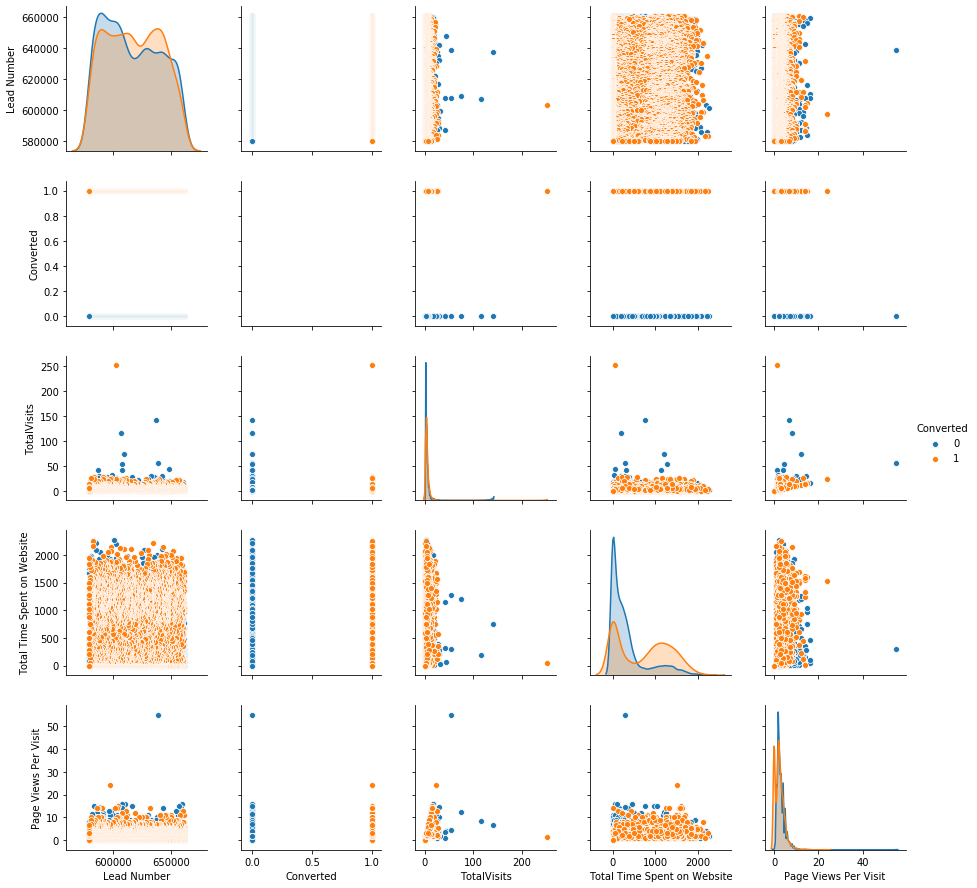

In [302]:
# making pairplots
sns.pairplot(leads,hue="Converted")
plt.show

From pair plot we can see that how the variables are related to each other. we can see that "Page Views Per Visit" ,"TotalVisits" "Total Time Spent on Website" has some outliers.

#### Heatmap

C:\Users\MAhaDev\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\MAhaDev\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


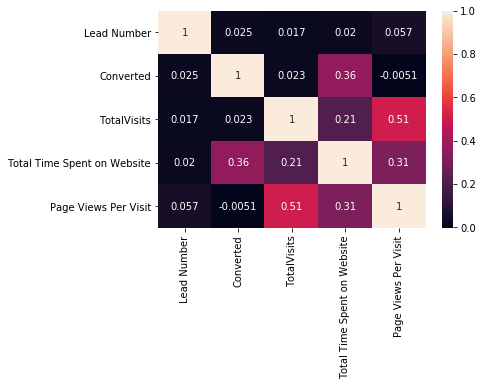

In [303]:
ax=sns.heatmap(leads.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

 we do not find very much multicollinearity between the variables. we decide to move with these variables.

#### barplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

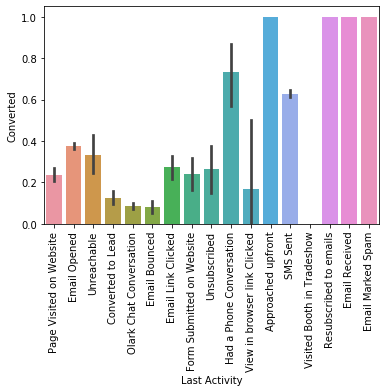

In [304]:
# plotting barplot 
sns.barplot(x="Last Activity",y="Converted",data=leads)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

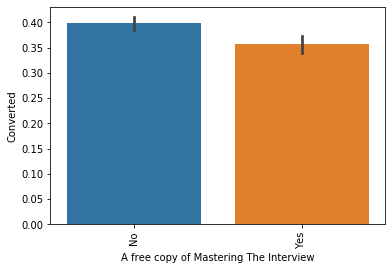

In [305]:
# plotting barplot
sns.barplot(x="A free copy of Mastering The Interview",y="Converted",data=leads)
plt.xticks(rotation=90)

Converted seems same for both but those who said "No" are most converted.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

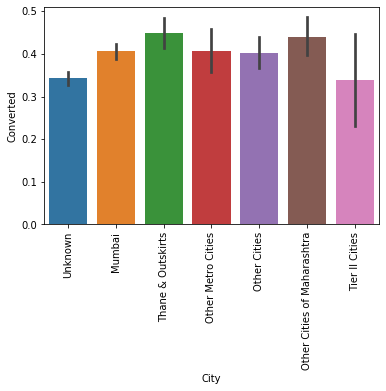

In [306]:
# plotting barplot
sns.barplot(x="City",y="Converted",data=leads)
plt.xticks(rotation=90)

"Thane $ Outskirts" and "Other Cities of Maharashtra" have higher Converted rate.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

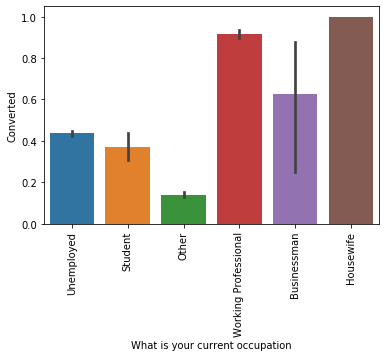

In [307]:
sns.barplot(x="What is your current occupation",y="Converted",data=leads)
plt.xticks(rotation=90)

"Working Professional" and "Housewife" have more chance of getting converted.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

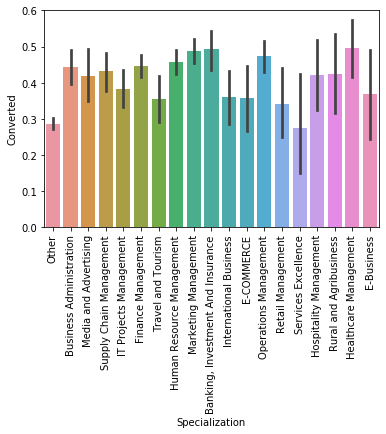

In [308]:
# plotting bar plot
sns.barplot(x="Specialization",y="Converted",data=leads)
plt.xticks(rotation=90)

"Investment and Insurance","Healthcare Management" are more likely to convert

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

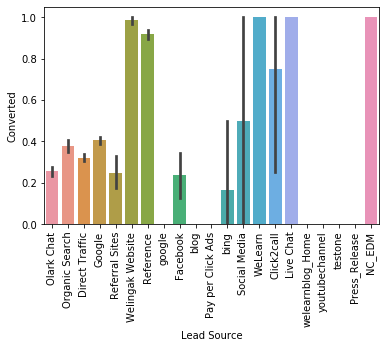

In [309]:
sns.barplot(x="Lead Source",y="Converted",data=leads)
plt.xticks(rotation=90)

"Welingak website" lead source are more likely to convert

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

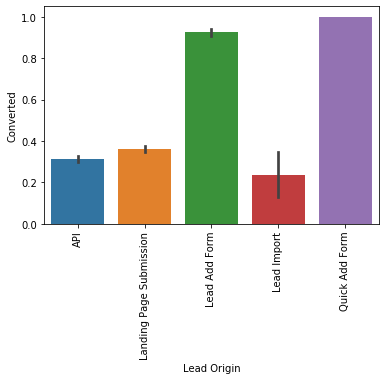

In [310]:
# plotting barplot
sns.barplot(x="Lead Origin",y="Converted",data=leads)
plt.xticks(rotation=90)

 when "Lead Origin" is "Lead Add Form" and "Quick Add Form" are more likely to convert

#### distplot

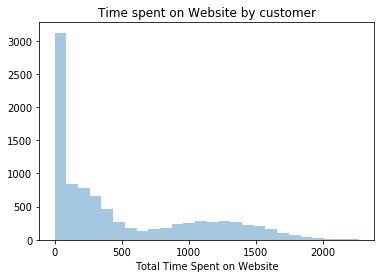

In [311]:
# Plotting distplot "Time spent on Website by customer"
sns.distplot(leads['Total Time Spent on Website'],kde=False)
plt.title("Time spent on Website by customer")
plt.show()

we see that "Time spent on Website by customer" is more in the range 0-500

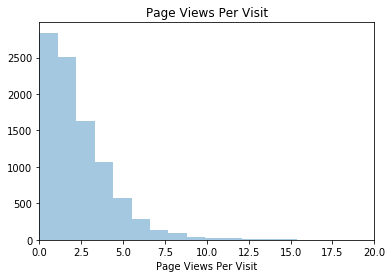

In [312]:
# plotting distplot "Page Views Per Visit"
sns.distplot(leads['Page Views Per Visit'],kde=False)
plt.title("Page Views Per Visit")
plt.xlim(0,20)
plt.show()

we see that "Page Views Per Visit" is between 0-12 more likely.

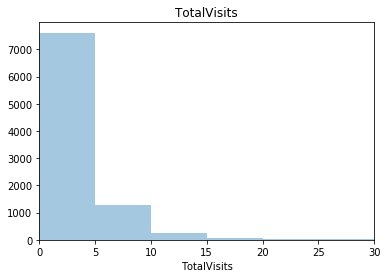

In [313]:
# plotting distplot "TotalVisits"
sns.distplot(leads['TotalVisits'],kde=False)
plt.title("TotalVisits")
plt.xlim(0,30)
plt.show()

we see that "TotalVisits" is in the range 0-20 more likely.

#### Boxplot

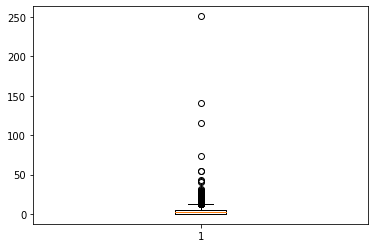

In [314]:
# PLotting "boxplot" for "TotalVisits"
plt.boxplot(leads['TotalVisits'])
plt.show()

we see that "TotalVisits" has outliers, so we will handle the outliers.

#### Outlier Analysis

In [315]:
# handling the outliers , to handle the upper end with 0.99 quantile.
q1=leads['TotalVisits'].quantile(0.99)
leads['TotalVisits'][leads['TotalVisits']>=q1] = q1

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


So we are handling the outlier by handling the upper end. whatever the values are above 0.99 are assigned 0.99 values.

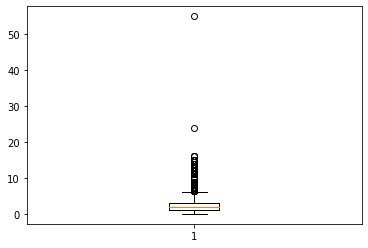

In [316]:
# plotting boxplot for "Page Views Per Visit"
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

This "Page Views Per Visit" also has outliers. So we need to handle them. we can do upper end capping in this column also.

#### Outlier Handling

In [317]:
q2=leads['Page Views Per Visit'].quantile(0.99)
leads['Page Views Per Visit'][leads['Page Views Per Visit']>=q2] = q2

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Here also we are doing upper end capping.

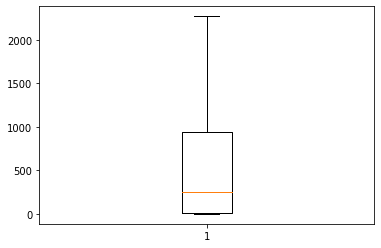

In [318]:
# plotting boxplot for "Total Time Spent on Website"
plt.boxplot(leads['Total Time Spent on Website'])
plt.show()

here we do not have any outliers in "Total Time Spent on Website".

### Multivariate Analysis

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

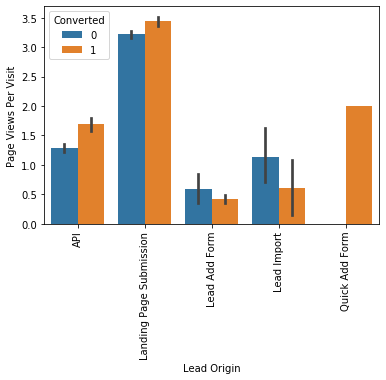

In [319]:
# plotting barplot
sns.barplot(x="Lead Origin",y="Page Views Per Visit",hue="Converted",data=leads)
plt.xticks(rotation=90)

We see that when "Lead Origin" is Landing Page Submission "Page views per visit is more.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

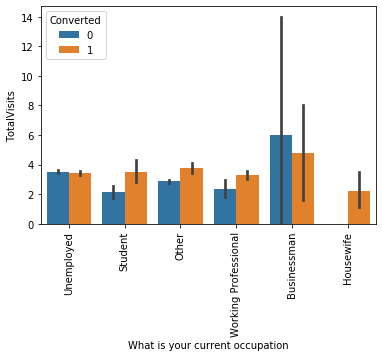

In [320]:
#plotting barplot
sns.barplot(x="What is your current occupation",y="TotalVisits",hue="Converted",data=leads)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

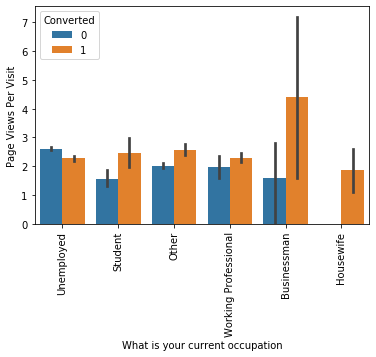

In [321]:
# plotting barpot
sns.barplot(x="What is your current occupation",y="Page Views Per Visit",hue="Converted",data=leads)
plt.xticks(rotation=90)

# Data Preparation

In [322]:
# putting yes=1,No=0
leads['A free copy of Mastering The Interview']=leads['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})

In [323]:
# checking head
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Unknown,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Unknown,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,0


#### One Hot Encoding

In [324]:
# creating dummy variable and concatenating it with out original dataset
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                               'What is your current occupation','City']], drop_first=True)
leads = pd.concat([leads, dummy1], axis=1)

In [325]:
# checkinge head
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Unknown,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [326]:
#checking shape
leads.shape

(9240, 81)

In [327]:
# Dropping the original ones after creating dummy variables
leads=leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City'],1)

In [328]:
# chcking shape again
leads.shape

(9240, 75)

Now we have 75 columns finally to move ahead.

In [329]:
# checking head
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,660727,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [330]:
# checking datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 75 columns):
Lead Number                                             9240 non-null int64
Converted                                               9240 non-null int64
TotalVisits                                             9240 non-null float64
Total Time Spent on Website                             9240 non-null int64
Page Views Per Visit                                    9240 non-null float64
A free copy of Mastering The Interview                  9240 non-null int64
Lead Origin_Landing Page Submission                     9240 non-null uint8
Lead Origin_Lead Add Form                               9240 non-null uint8
Lead Origin_Lead Import                                 9240 non-null uint8
Lead Origin_Quick Add Form                              9240 non-null uint8
Lead Source_Direct Traffic                              9240 non-null uint8
Lead Source_Facebook                                 

In [331]:
# checking statistics
leads.describe

<bound method NDFrame.describe of       Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0          660737          0          0.0                            0   
1          660728          0          5.0                          674   
2          660727          1          2.0                         1532   
3          660719          0          1.0                          305   
4          660681          1          2.0                         1428   
...           ...        ...          ...                          ...   
9235       579564          1          8.0                         1845   
9236       579546          0          2.0                          238   
9237       579545          0          2.0                          199   
9238       579538          1          3.0                          499   
9239       579533          1          6.0                         1279   

      Page Views Per Visit  A free copy of Mastering The Interview  \
0      

# Train Test Split

In [332]:
# splitting data into X and Y.
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [333]:
# getting Y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [334]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [335]:
#checking train head
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
1871,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6795,4.0,487,1.33,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3516,5.0,106,2.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8105,5.0,1230,5.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3934,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


# Feature Scaling

In [336]:
# Instantiate scaler and perform scaler on Train data
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MAhaDev\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\MAhaDev\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
1871,-1.000699,-0.885371,-1.180474,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6795,0.217773,0.005716,-0.503379,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3516,0.522390,-0.691418,0.092260,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8105,0.522390,1.365219,1.364995,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3934,-1.000699,-0.885371,-1.180474,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [337]:
# checking how converted is distributed.
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.53896103896104

Not skewed, Relevant to go ahead and perform the logistic regression.

In [338]:
# checking correlation
leads.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
Lead Number,1.000000,0.025157,0.032339,0.020329,0.059445,-0.109696,-0.075012,0.029158,0.104726,0.007748,-0.143405,0.102449,0.131736,0.012135,-0.015217,-0.068590,-0.020389,0.014557,-0.015673,0.025042,0.169551,-0.000597,0.011583,0.014201,0.013049,0.014802,0.031825,-0.003385,0.006631,0.003789,0.013035,-0.048827,0.025745,-0.021031,0.107735,-0.017607,0.013858,0.003652,0.002579,0.009524,0.005940,-0.137925,0.075807,-0.002317,0.024856,0.014771,-0.008839,0.003296,-0.000594,-0.010096,-0.005607,0.002790,-0.010532,-0.031586,-0.011288,-0.001916,-0.015190,-0.010001,0.052579,-0.011429,0.024602,-0.021392,-0.019434,-0.004434,-0.011909,0.048443,-0.031019,-0.025559,-0.017605,0.007872,-0.001991,-0.024503,0.025089,-0.039357,0.035532
Converted,0.025157,1.000000,0.033704,0.362483,-0.004603,-0.039820,-0.051236,0.321702,-0.023695,0.013138,-0.080682,-0.023695,0.027221,0.018581,0.013138,-0.129459,-0.005879,-0.008238,-0.011651,0.270830,-0.033058,0.003465,0.013138,0.154153,-0.011456,-0.008238,-0.018425,-0.008238,-0.008238,-0.008238,-0.117383,-0.120095,-0.039690,0.018581,-0.013850,0.018581,-0.033364,0.040803,-0.210809,-0.083771,0.013138,0.325600,-0.010785,-0.020618,-0.011456,-0.008238,0.025791,-0.002747,-0.006429,0.043308,0.030306,0.008190,0.047130,-0.001200,-0.007441,0.065853,0.010264,0.043272,-0.154025,-0.009755,0.007200,-0.014956,0.019245,-0.009457,0.041567,-0.323908,-0.004375,0.128710,0.313837,0.009859,0.025513,0.009576,0.039189,-0.008779,-0.071350
TotalVisits,0.032339,0.033704,1.000000,0.311558,0.703106,0.288000,0.420056,-0.272334,-0.074642,-0.010500,0.126593,-0.072912,0.176809,-0.014851,0.011886,-0.436902,0.292339,-0.000906,0.025857,-0.233001,0.087716,-0.003543,-0.004104,-0.118521,-0.008750,0.002292,0.016571,0.005490,-0.004104,0.002292,-0.093590,-0.067508,-0.026344,0.003242,0.036201,0

# Model Building

#### First Model

In [339]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodel

C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodel

C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels

C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodel

C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodel

C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels

C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\statsmodel

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Sep 2020   Deviance:                          nan
Time:                        23:25:17   Pearson chi2:                 7.84e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.989e+15   5.67e+07   7.03e+07      0.000    3.99e+15    3.99e+15
TotalVisits                                           1.095e+14   1.26e+06   8.71e+07      0.000    1.09e+14    1.09e+14
Total Time Spent on Website                            7.02e+14   9.51e+05   7.38e+08      0.000    7.02e+14    7.02e+14
Page Views Per Visit                                 -1.406e+14   1.37e+06  -1.03e+08      0.000   -1.41e+14   -1.41e+14
A free copy of Mastering The Interview               -1.449e+14   2.71e+06  -5.35e+07      0.000   -1.45e+14   -1.45e+14
Lead Origin_Landing Page Submission                  -1.638e+14   3.69e+06  -4.44e+07      0.000   -1.64e+14   -1.64e+14
Lead Origin_Lead Add Form                              -5.2e+14    1.3e+07     -4e+07      0.000    -5.2e+14    -5.2e+14
Lead Origin_Lead Import                               2.854e+14    4.8e+07   5.94e+06      0.000    2.85e+14    2.85e+14
Lead Origin_Quick Add Form                            2.426e+15    6.8e+07   3.57e+07      0.000    2.43e+15    2.43e+15
Lead Source_Direct Traffic                           -1.892e+15   4.11e+07   -4.6e+07      0.000   -1.89e+15   -1.89e+15
Lead Source_Facebook                                  -2.26e+15   6.32e+07  -3.58e+07      0.000   -2.26e+15   -2.26e+15
Lead Source_Google                                   -1.621e+15    4.1e+07  -3.96e+07      0.000   -1.62e+15   -1.62e+15
Lead Source_Live Chat                                 2.887e+15   6.14e+07    4.7e+07      0.000    2.89e+15    2.89e+15
Lead Source_NC_EDM                                    2.252e+15   7.87e+07   2.86e+07      0.000    2.25e+15    2.25e+15
Lead Source_Olark Chat                               -1.034e+15   4.11e+07  -2.52e+07      0.000   -1.03e+15   -1.03e+15
Lead Source_Organic Search                           -1.734e+15   4.11e+07  -4.22e+07      0.000   -1.73e+15   -1.73e+15
Lead Source_Pay per Click Ads                        -1.413e+15   7.88e+07  -1.79e+07      0.000   -1.41e+15   -1.41e+15
Lead Source_Press_Release                            -3.694e+15   6.29e+07  -5.87e+07      0.000   -3.69e+15   -3.69e+15
Lead Source_Reference                                -9.187e+14    3.9e+07  -2.35e+07      0.000   -9.19e+14   -9.19e+14
Lead Source_Referral Sites                           -1.787e+15   4.16e+07  -4.29e+07      0.000   -1.79e+15   -1.79e+15
Lead Source_Social Media                             -1.758e+15   6.29e+07   -2.8e+07      0.000   -1.76e+15   -1.76e+15
Lead Source_WeLearn                                  -2.866e+15   7.88e+07  -3.64e+07      0.000   -2.87e+15   -2.87e+15
Lead Source_Welingak Website                         -5.65

In [340]:
# Instantiate object
logreg = LogisticRegression()

### RFE

In [341]:
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [342]:
# RFE chosen variables
rfe.support_

array([False,  True, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
        True])

In [343]:
# RFE supported and non supported varibles with rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Origin_Quick Add Form', False, 36),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 18),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 13),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 24),
 ('Lead Source_blog', False, 38),
 ('Lead Source_google', Fa

In [344]:
# assinging the variables that RFE supports to "col"
col = X_train.columns[rfe.support_]

In [345]:
# variables that RFE doesn't support
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specializ

#### Second Model

In [346]:
# buliding model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.3
Date:                Mon, 07 Sep 2020   Deviance:                       5208.5
Time:                        23:25:22   Pearson chi2:                 8.09e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1192      0.142      0.842      0.400      -0.158       0.397
Total Time Spent on Website                              1.0735      0.040     26.804      0.000       0.995       1.152
Lead Origin_Landing Page Submission                     -1.2339      0.143     -8.610      0.000      -1.515      -0.953
Lead Origin_Lead Add Form                                2.6940      0.203     13.271      0.000       2.296       3.092
Lead Source_Facebook                                    -1.0292      0.537     -1.915      0.055      -2.083       0.024
Lead Source_NC_EDM                                      23.8945   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.0657      0.124      8.567      0.000       0.822       1.310
Lead Source_Social Media                                 1.5818      1.522      1.039      0.299      -1.401       4.565
Lead Source_Welingak Website                             2.4512      0.750      3.267      0.001       0.981       3.922
Last Activity_Converted to Lead                         -1.2616      0.221     -5.712      0.000      -1.695      -0.829
Last Activity_Email Bounced                             -1.8912      0.300     -6.307      0.000      -2.479      -1.303
Last Activity_Email Link Clicked                        -0.5088      0.228     -2.235      0.025      -0.955      -0.063
Last Activity_Form Submitted on Website                 -0.9680      0.363     -2.667      0.008      -1.679      -0.257
Last Activity_Had a Phone Conversation                   1.8847      0.663      2.842      0.004       0.585       3.184
Last Activity_Olark Chat Conversation                   -1.3406      0.173     -7.738      0.000      -1.680      -1.001
Last Activity_Page Visited on Website                   -0.5930      0.149     -3.993      0.000      -0.884      -0.302
Last Activity_Resubscribed to emails                    24.5803   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.0993      0.079     13.966      0.000       0.945       1.254
Specialization_Hospitality Management                   -0.9677      0.332     -2.919      0.004      -1.618      -0.318
Specialization_Other                                    -0.6507      0.161     -4.045      0.000      -0.966      -0.335
Specialization_Retail Management                        -0.4267      0.333     -1.281      0.200      -1.080       0.226
Specialization_Rural and Agribusiness                    0.4921      0.389      1.266      0.206      -0.270       1.254
What is your current occupation_Housewife               22

In [347]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.432520
6795    0.146876
3516    0.328692
8105    0.810009
3934    0.284487
4844    0.988750
3297    0.196860
8071    0.999002
987     0.060609
7423    0.898552
dtype: float64

In [348]:
# Reshping 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43252019, 0.14687573, 0.32869184, 0.81000949, 0.28448749,
       0.98875012, 0.19686023, 0.99900223, 0.06060932, 0.89855173])

In [349]:
# making dataframe having Convert and "Convert_prob"
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number
0,0,0.432520,1871
1,0,0.146876,6795
2,0,0.328692,3516
3,0,0.810009,8105
4,0,0.284487,3934


In [350]:
# going with cutoff 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted
0,0,0.432520,1871,0
1,0,0.146876,6795,0
2,0,0.328692,3516,0
3,0,0.810009,8105,1
4,0,0.284487,3934,0


In [351]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3558  444]
 [ 708 1758]]


In [352]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8218923933209648


#### VIF

In [353]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,City_Unknown,7.62
18,Specialization_Other,6.96
5,Lead Source_Olark Chat,2.14
1,Lead Origin_Landing Page Submission,2.05
16,Last Activity_SMS Sent,1.78
22,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.57
13,Last Activity_Olark Chat Conversation,1.55
23,What is your current occupation_Working Profes...,1.29
7,Lead Source_Welingak Website,1.27


"Lead Source_NC_EDM" having highes p value so decided to drop it.

In [354]:
# Drop
col = col.drop('Lead Source_NC_EDM', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Third Model

In [355]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.8
Date:                Mon, 07 Sep 2020   Deviance:                       5211.6
Time:                        23:25:23   Pearson chi2:                 8.09e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1196      0.142      0.845      0.398      -0.158       0.397
Total Time Spent on Website                              1.0737      0.040     26.814      0.000       0.995       1.152
Lead Origin_Landing Page Submission                     -1.2323      0.143     -8.600      0.000      -1.513      -0.951
Lead Origin_Lead Add Form                                2.6954      0.203     13.278      0.000       2.297       3.093
Lead Source_Facebook                                    -1.0291      0.537     -1.915      0.056      -2.083       0.024
Lead Source_Olark Chat                                   1.0657      0.124      8.568      0.000       0.822       1.309
Lead Source_Social Media                                 1.5826      1.522      1.040      0.298      -1.401       4.566
Lead Source_Welingak Website                             2.4516      0.750      3.267      0.001       0.981       3.922
Last Activity_Converted to Lead                         -1.2637      0.221     -5.722      0.000      -1.697      -0.831
Last Activity_Email Bounced                             -1.8934      0.300     -6.315      0.000      -2.481      -1.306
Last Activity_Email Link Clicked                        -0.5108      0.228     -2.245      0.025      -0.957      -0.065
Last Activity_Form Submitted on Website                 -0.9705      0.363     -2.674      0.007      -1.682      -0.259
Last Activity_Had a Phone Conversation                   1.8821      0.663      2.839      0.005       0.583       3.182
Last Activity_Olark Chat Conversation                   -1.3423      0.173     -7.748      0.000      -1.682      -1.003
Last Activity_Page Visited on Website                   -0.5956      0.148     -4.011      0.000      -0.887      -0.305
Last Activity_Resubscribed to emails                    24.5759   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.0969      0.079     13.942      0.000       0.943       1.251
Specialization_Hospitality Management                   -0.9693      0.332     -2.924      0.003      -1.619      -0.320
Specialization_Other                                    -0.6516      0.161     -4.051      0.000      -0.967      -0.336
Specialization_Retail Management                        -0.4279      0.333     -1.285      0.199      -1.081       0.225
Specialization_Rural and Agribusiness                    0.4907      0.389      1.262      0.207      -0.271       1.253
What is your current occupation_Housewife               22.7908   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
What is your current occupation_Other                   -1

In [356]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.432627
6795    0.147025
3516    0.328599
8105    0.810025
3934    0.284391
4844    0.988748
3297    0.196934
8071    0.999001
987     0.060763
7423    0.898366
dtype: float64

In [357]:
# reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.4326274 , 0.14702527, 0.32859944, 0.81002497, 0.28439127,
       0.98874794, 0.19693381, 0.99900102, 0.06076325, 0.89836623])

In [358]:
# making dataframe having Convert and "Convert_prob"
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number
0,0,0.432627,1871
1,0,0.147025,6795
2,0,0.328599,3516
3,0,0.810025,8105
4,0,0.284391,3934


In [359]:
# Taking cut off as 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted
0,0,0.432627,1871,0
1,0,0.147025,6795,0
2,0,0.328599,3516,0
3,0,0.810025,8105,1
4,0,0.284391,3934,0


In [360]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3557  445]
 [ 709 1757]]


In [361]:
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8215831787260359


we have good accuracy of 82.15 % but still we have variables having high p values.

#### VIF

In [362]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,City_Unknown,7.62
17,Specialization_Other,6.96
4,Lead Source_Olark Chat,2.14
1,Lead Origin_Landing Page Submission,2.05
15,Last Activity_SMS Sent,1.78
21,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.57
12,Last Activity_Olark Chat Conversation,1.55
22,What is your current occupation_Working Profes...,1.29
6,Lead Source_Welingak Website,1.27


dropping "Last Activity_Resubscribed to emails'" on the basis of p values>0.05

In [363]:
# dropping variable
col = col.drop('Last Activity_Resubscribed to emails', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Fourth Model

In [364]:
# Building model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.0
Date:                Mon, 07 Sep 2020   Deviance:                       5215.9
Time:                        23:25:25   Pearson chi2:                 8.10e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1182      0.142      0.835      0.404      -0.159       0.396
Total Time Spent on Website                              1.0734      0.040     26.812      0.000       0.995       1.152
Lead Origin_Landing Page Submission                     -1.2302      0.143     -8.588      0.000      -1.511      -0.949
Lead Origin_Lead Add Form                                2.6965      0.203     13.284      0.000       2.299       3.094
Lead Source_Facebook                                    -1.0285      0.537     -1.914      0.056      -2.082       0.025
Lead Source_Olark Chat                                   1.0712      0.124      8.618      0.000       0.828       1.315
Lead Source_Social Media                                 1.5862      1.521      1.043      0.297      -1.396       4.568
Lead Source_Welingak Website                             2.4508      0.750      3.266      0.001       0.980       3.921
Last Activity_Converted to Lead                         -1.2649      0.221     -5.728      0.000      -1.698      -0.832
Last Activity_Email Bounced                             -1.8955      0.300     -6.324      0.000      -2.483      -1.308
Last Activity_Email Link Clicked                        -0.5141      0.227     -2.260      0.024      -0.960      -0.068
Last Activity_Form Submitted on Website                 -0.9720      0.363     -2.679      0.007      -1.683      -0.261
Last Activity_Had a Phone Conversation                   1.8808      0.663      2.837      0.005       0.581       3.180
Last Activity_Olark Chat Conversation                   -1.3481      0.173     -7.786      0.000      -1.687      -1.009
Last Activity_Page Visited on Website                   -0.5975      0.148     -4.024      0.000      -0.888      -0.306
Last Activity_SMS Sent                                   1.0944      0.079     13.918      0.000       0.940       1.249
Specialization_Hospitality Management                   -0.9689      0.331     -2.923      0.003      -1.619      -0.319
Specialization_Other                                    -0.6506      0.161     -4.044      0.000      -0.966      -0.335
Specialization_Retail Management                        -0.4276      0.333     -1.284      0.199      -1.080       0.225
Specialization_Rural and Agribusiness                    0.4903      0.389      1.261      0.207      -0.272       1.252
What is your current occupation_Housewife               22.7907   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
What is your current occupation_Other                   -1.0825      0.087    -12.415      0.000      -1.253      -0.912
What is your current occupation_Working Professional     2

In [365]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3556  446]
 [ 709 1757]]
0.8214285714285714


#### VIF

In [366]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,City_Unknown,7.62
16,Specialization_Other,6.96
4,Lead Source_Olark Chat,2.14
1,Lead Origin_Landing Page Submission,2.05
14,Last Activity_SMS Sent,1.78
20,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.57
12,Last Activity_Olark Chat Conversation,1.55
21,What is your current occupation_Working Profes...,1.29
6,Lead Source_Welingak Website,1.27


dropping "What is your current occupation_Housewife'" on the basis of p values.

In [367]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Fifth Model

In [368]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.6
Date:                Mon, 07 Sep 2020   Deviance:                       5229.1
Time:                        23:25:27   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1231      0.141      0.871      0.384      -0.154       0.400
Total Time Spent on Website                              1.0724      0.040     26.818      0.000       0.994       1.151
Lead Origin_Landing Page Submission                     -1.2234      0.143     -8.553      0.000      -1.504      -0.943
Lead Origin_Lead Add Form                                2.7101      0.203     13.362      0.000       2.313       3.108
Lead Source_Facebook                                    -1.0297      0.537     -1.917      0.055      -2.083       0.023
Lead Source_Olark Chat                                   1.0697      0.124      8.609      0.000       0.826       1.313
Lead Source_Social Media                                 1.5831      1.521      1.041      0.298      -1.398       4.564
Lead Source_Welingak Website                             2.4355      0.750      3.246      0.001       0.965       3.906
Last Activity_Converted to Lead                         -1.2716      0.221     -5.762      0.000      -1.704      -0.839
Last Activity_Email Bounced                             -1.9034      0.300     -6.349      0.000      -2.491      -1.316
Last Activity_Email Link Clicked                        -0.5110      0.226     -2.258      0.024      -0.954      -0.068
Last Activity_Form Submitted on Website                 -0.8781      0.353     -2.484      0.013      -1.571      -0.185
Last Activity_Had a Phone Conversation                   1.8716      0.663      2.824      0.005       0.573       3.170
Last Activity_Olark Chat Conversation                   -1.3509      0.173     -7.803      0.000      -1.690      -1.012
Last Activity_Page Visited on Website                   -0.6049      0.148     -4.077      0.000      -0.896      -0.314
Last Activity_SMS Sent                                   1.0865      0.079     13.833      0.000       0.933       1.240
Specialization_Hospitality Management                   -0.9743      0.331     -2.940      0.003      -1.624      -0.325
Specialization_Other                                    -0.6512      0.161     -4.049      0.000      -0.966      -0.336
Specialization_Retail Management                        -0.4363      0.333     -1.311      0.190      -1.088       0.216
Specialization_Rural and Agribusiness                    0.4838      0.388      1.245      0.213      -0.278       1.245
What is your current occupation_Other                   -1.0867      0.087    -12.473      0.000      -1.257      -0.916
What is your current occupation_Working Professional     2.4828      0.190     13.099      0.000       2.111       2.854
City_Unknown                                            -0

In [369]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3554  448]
 [ 710 1756]]
0.8209647495361782


#### VIF

In [370]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,City_Unknown,7.62
16,Specialization_Other,6.96
4,Lead Source_Olark Chat,2.14
1,Lead Origin_Landing Page Submission,2.04
14,Last Activity_SMS Sent,1.78
19,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.56
12,Last Activity_Olark Chat Conversation,1.55
20,What is your current occupation_Working Profes...,1.29
6,Lead Source_Welingak Website,1.27


dropping "Lead Source_Social Media" on the basis of p values.

In [371]:
col = col.drop('Lead Source_Social Media', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Sixth Model

In [372]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.1
Date:                Mon, 07 Sep 2020   Deviance:                       5230.2
Time:                        23:25:28   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1258      0.141      0.890      0.373      -0.151       0.403
Total Time Spent on Website                              1.0722      0.040     26.814      0.000       0.994       1.151
Lead Origin_Landing Page Submission                     -1.2254      0.143     -8.568      0.000      -1.506      -0.945
Lead Origin_Lead Add Form                                2.7072      0.203     13.350      0.000       2.310       3.105
Lead Source_Facebook                                    -1.0261      0.537     -1.910      0.056      -2.079       0.027
Lead Source_Olark Chat                                   1.0665      0.124      8.588      0.000       0.823       1.310
Lead Source_Welingak Website                             2.4371      0.750      3.248      0.001       0.967       3.908
Last Activity_Converted to Lead                         -1.2722      0.221     -5.765      0.000      -1.705      -0.840
Last Activity_Email Bounced                             -1.9034      0.300     -6.350      0.000      -2.491      -1.316
Last Activity_Email Link Clicked                        -0.5109      0.226     -2.258      0.024      -0.954      -0.067
Last Activity_Form Submitted on Website                 -0.8784      0.353     -2.485      0.013      -1.571      -0.186
Last Activity_Had a Phone Conversation                   1.8705      0.663      2.822      0.005       0.571       3.170
Last Activity_Olark Chat Conversation                   -1.3407      0.172     -7.773      0.000      -1.679      -1.003
Last Activity_Page Visited on Website                   -0.6008      0.148     -4.050      0.000      -0.891      -0.310
Last Activity_SMS Sent                                   1.0863      0.079     13.830      0.000       0.932       1.240
Specialization_Hospitality Management                   -0.9752      0.331     -2.943      0.003      -1.625      -0.326
Specialization_Other                                    -0.6598      0.161     -4.107      0.000      -0.975      -0.345
Specialization_Retail Management                        -0.4370      0.333     -1.314      0.189      -1.089       0.215
Specialization_Rural and Agribusiness                    0.4826      0.389      1.242      0.214      -0.279       1.244
What is your current occupation_Other                   -1.0877      0.087    -12.486      0.000      -1.258      -0.917
What is your current occupation_Working Professional     2.4808      0.190     13.089      0.000       2.109       2.852
City_Unknown                                            -0.4973      0.172     -2.886      0.004      -0.835      -0.160
==========================================================

In [373]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3553  449]
 [ 711 1755]]
0.8206555349412492


#### VIF

In [374]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,City_Unknown,7.61
15,Specialization_Other,6.95
4,Lead Source_Olark Chat,2.14
1,Lead Origin_Landing Page Submission,2.04
13,Last Activity_SMS Sent,1.78
18,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.56
11,Last Activity_Olark Chat Conversation,1.54
19,What is your current occupation_Working Profes...,1.29
5,Lead Source_Welingak Website,1.27


dropping "Specialization_Rural and Agribusiness" on the basis of p values.

In [375]:
col = col.drop('Specialization_Rural and Agribusiness', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'Specialization_Retail Management',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Seventh Model

In [376]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.8
Date:                Mon, 07 Sep 2020   Deviance:                       5231.7
Time:                        23:25:29   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1336      0.141      0.946      0.344      -0.143       0.410
Total Time Spent on Website                              1.0716      0.040     26.808      0.000       0.993       1.150
Lead Origin_Landing Page Submission                     -1.2264      0.143     -8.576      0.000      -1.507      -0.946
Lead Origin_Lead Add Form                                2.7063      0.203     13.348      0.000       2.309       3.104
Lead Source_Facebook                                    -1.0286      0.537     -1.915      0.056      -2.081       0.024
Lead Source_Olark Chat                                   1.0680      0.124      8.602      0.000       0.825       1.311
Lead Source_Welingak Website                             2.4377      0.750      3.249      0.001       0.967       3.908
Last Activity_Converted to Lead                         -1.2694      0.221     -5.752      0.000      -1.702      -0.837
Last Activity_Email Bounced                             -1.9030      0.300     -6.345      0.000      -2.491      -1.315
Last Activity_Email Link Clicked                        -0.5151      0.226     -2.277      0.023      -0.959      -0.072
Last Activity_Form Submitted on Website                 -0.8848      0.353     -2.503      0.012      -1.577      -0.192
Last Activity_Had a Phone Conversation                   1.8646      0.663      2.814      0.005       0.566       3.163
Last Activity_Olark Chat Conversation                   -1.3434      0.172     -7.789      0.000      -1.681      -1.005
Last Activity_Page Visited on Website                   -0.5972      0.148     -4.032      0.000      -0.887      -0.307
Last Activity_SMS Sent                                   1.0846      0.079     13.814      0.000       0.931       1.239
Specialization_Hospitality Management                   -0.9808      0.331     -2.960      0.003      -1.630      -0.331
Specialization_Other                                    -0.6663      0.160     -4.153      0.000      -0.981      -0.352
Specialization_Retail Management                        -0.4428      0.333     -1.331      0.183      -1.095       0.209
What is your current occupation_Other                   -1.0889      0.087    -12.503      0.000      -1.260      -0.918
What is your current occupation_Working Professional     2.4778      0.189     13.080      0.000       2.107       2.849
City_Unknown                                            -0.4983      0.172     -2.893      0.004      -0.836      -0.161
========================================================================================================================
"""

In [377]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3554  448]
 [ 708 1758]]
0.821273964131107


#### VIF

In [378]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,City_Unknown,7.61
15,Specialization_Other,6.95
4,Lead Source_Olark Chat,2.14
1,Lead Origin_Landing Page Submission,2.03
13,Last Activity_SMS Sent,1.78
17,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.56
11,Last Activity_Olark Chat Conversation,1.54
18,What is your current occupation_Working Profes...,1.29
5,Lead Source_Welingak Website,1.27


dropping "Specialization_Retail Management" on the basis of p values.

In [379]:
col = col.drop('Specialization_Retail Management', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Eighth Model

In [380]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.7
Date:                Mon, 07 Sep 2020   Deviance:                       5233.5
Time:                        23:25:29   Pearson chi2:                 8.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1304      0.141      0.924      0.356      -0.146       0.407
Total Time Spent on Website                              1.0701      0.040     26.802      0.000       0.992       1.148
Lead Origin_Landing Page Submission                     -1.2297      0.143     -8.597      0.000      -1.510      -0.949
Lead Origin_Lead Add Form                                2.7044      0.203     13.339      0.000       2.307       3.102
Lead Source_Facebook                                    -1.0285      0.537     -1.915      0.055      -2.081       0.024
Lead Source_Olark Chat                                   1.0650      0.124      8.581      0.000       0.822       1.308
Lead Source_Welingak Website                             2.4379      0.750      3.249      0.001       0.967       3.909
Last Activity_Converted to Lead                         -1.2767      0.221     -5.784      0.000      -1.709      -0.844
Last Activity_Email Bounced                             -1.9110      0.300     -6.367      0.000      -2.499      -1.323
Last Activity_Email Link Clicked                        -0.5120      0.226     -2.263      0.024      -0.955      -0.069
Last Activity_Form Submitted on Website                 -0.9012      0.353     -2.551      0.011      -1.594      -0.209
Last Activity_Had a Phone Conversation                   1.8694      0.663      2.821      0.005       0.571       3.168
Last Activity_Olark Chat Conversation                   -1.3425      0.172     -7.786      0.000      -1.680      -1.005
Last Activity_Page Visited on Website                   -0.5993      0.148     -4.047      0.000      -0.889      -0.309
Last Activity_SMS Sent                                   1.0829      0.078     13.798      0.000       0.929       1.237
Specialization_Hospitality Management                   -0.9725      0.331     -2.936      0.003      -1.622      -0.323
Specialization_Other                                    -0.6618      0.160     -4.125      0.000      -0.976      -0.347
What is your current occupation_Other                   -1.0879      0.087    -12.495      0.000      -1.259      -0.917
What is your current occupation_Working Professional     2.4787      0.190     13.075      0.000       2.107       2.850
City_Unknown                                            -0.4978      0.172     -2.890      0.004      -0.835      -0.160
========================================================================================================================
"""

In [381]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3555  447]
 [ 710 1756]]
0.8211193568336426


#### VIF

In [382]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,City_Unknown,7.61
15,Specialization_Other,6.95
4,Lead Source_Olark Chat,2.14
1,Lead Origin_Landing Page Submission,2.02
13,Last Activity_SMS Sent,1.78
16,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.56
11,Last Activity_Olark Chat Conversation,1.54
17,What is your current occupation_Working Profes...,1.29
5,Lead Source_Welingak Website,1.27


dropping "Lead Source_Facebook" on the basis of p values.

In [383]:
col = col.drop('Lead Source_Facebook', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Nineth Model

In [384]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.8
Date:                Mon, 07 Sep 2020   Deviance:                       5237.6
Time:                        23:25:30   Pearson chi2:                 8.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0668      0.137      0.488      0.625      -0.201       0.335
Total Time Spent on Website                              1.0748      0.040     26.953      0.000       0.997       1.153
Lead Origin_Landing Page Submission                     -1.1695      0.139     -8.403      0.000      -1.442      -0.897
Lead Origin_Lead Add Form                                2.7408      0.202     13.569      0.000       2.345       3.137
Lead Source_Olark Chat                                   1.0937      0.123      8.863      0.000       0.852       1.336
Lead Source_Welingak Website                             2.4308      0.750      3.240      0.001       0.960       3.901
Last Activity_Converted to Lead                         -1.2710      0.221     -5.753      0.000      -1.704      -0.838
Last Activity_Email Bounced                             -1.9116      0.300     -6.368      0.000      -2.500      -1.323
Last Activity_Email Link Clicked                        -0.5072      0.226     -2.241      0.025      -0.951      -0.064
Last Activity_Form Submitted on Website                 -0.8836      0.353     -2.506      0.012      -1.575      -0.193
Last Activity_Had a Phone Conversation                   1.8781      0.663      2.834      0.005       0.579       3.177
Last Activity_Olark Chat Conversation                   -1.3365      0.172     -7.754      0.000      -1.674      -0.999
Last Activity_Page Visited on Website                   -0.5922      0.148     -4.000      0.000      -0.882      -0.302
Last Activity_SMS Sent                                   1.0825      0.078     13.799      0.000       0.929       1.236
Specialization_Hospitality Management                   -0.9877      0.330     -2.996      0.003      -1.634      -0.342
Specialization_Other                                    -0.7145      0.158     -4.527      0.000      -1.024      -0.405
What is your current occupation_Other                   -1.0874      0.087    -12.488      0.000      -1.258      -0.917
What is your current occupation_Working Professional     2.4711      0.190     13.035      0.000       2.100       2.843
City_Unknown                                            -0.4039      0.165     -2.448      0.014      -0.727      -0.080
========================================================================================================================
"""

In [385]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3555  447]
 [ 709 1757]]
0.821273964131107


In [386]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,City_Unknown,7.31
14,Specialization_Other,6.58
3,Lead Source_Olark Chat,2.13
1,Lead Origin_Landing Page Submission,2.02
12,Last Activity_SMS Sent,1.77
15,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.56
10,Last Activity_Olark Chat Conversation,1.54
16,What is your current occupation_Working Profes...,1.28
4,Lead Source_Welingak Website,1.27


In [387]:
col = col.drop('Last Activity_Email Link Clicked', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Tenth Model

In [388]:
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.5
Date:                Mon, 07 Sep 2020   Deviance:                       5243.0
Time:                        23:25:31   Pearson chi2:                 8.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0442      0.136      0.324      0.746      -0.223       0.312
Total Time Spent on Website                              1.0765      0.040     27.009      0.000       0.998       1.155
Lead Origin_Landing Page Submission                     -1.1735      0.139     -8.438      0.000      -1.446      -0.901
Lead Origin_Lead Add Form                                2.7348      0.202     13.559      0.000       2.339       3.130
Lead Source_Olark Chat                                   1.0844      0.123      8.804      0.000       0.843       1.326
Lead Source_Welingak Website                             2.4124      0.750      3.217      0.001       0.943       3.882
Last Activity_Converted to Lead                         -1.2438      0.221     -5.636      0.000      -1.676      -0.811
Last Activity_Email Bounced                             -1.8817      0.300     -6.275      0.000      -2.469      -1.294
Last Activity_Form Submitted on Website                 -0.8569      0.352     -2.431      0.015      -1.548      -0.166
Last Activity_Had a Phone Conversation                   1.9058      0.663      2.876      0.004       0.607       3.205
Last Activity_Olark Chat Conversation                   -1.3004      0.172     -7.572      0.000      -1.637      -0.964
Last Activity_Page Visited on Website                   -0.5646      0.148     -3.824      0.000      -0.854      -0.275
Last Activity_SMS Sent                                   1.1122      0.077     14.352      0.000       0.960       1.264
Specialization_Hospitality Management                   -0.9826      0.329     -2.987      0.003      -1.627      -0.338
Specialization_Other                                    -0.7094      0.158     -4.498      0.000      -1.019      -0.400
What is your current occupation_Other                   -1.0900      0.087    -12.522      0.000      -1.261      -0.919
What is your current occupation_Working Professional     2.4711      0.190     13.033      0.000       2.099       2.843
City_Unknown                                            -0.4162      0.165     -2.524      0.012      -0.739      -0.093
========================================================================================================================
"""

In [389]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3555  447]
 [ 709 1757]]
0.821273964131107


In [390]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,City_Unknown,7.28
13,Specialization_Other,6.58
3,Lead Source_Olark Chat,2.12
1,Lead Origin_Landing Page Submission,1.96
11,Last Activity_SMS Sent,1.73
14,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.56
9,Last Activity_Olark Chat Conversation,1.52
15,What is your current occupation_Working Profes...,1.28
4,Lead Source_Welingak Website,1.27


In [391]:
col = col.drop('Last Activity_Form Submitted on Website', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_Unknown'],
      dtype='object')

#### Eleventh Model

In [392]:
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.7
Date:                Mon, 07 Sep 2020   Deviance:                       5249.4
Time:                        23:25:32   Pearson chi2:                 8.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0024      0.135      0.018      0.986      -0.262       0.267
Total Time Spent on Website                              1.0770      0.040     27.040      0.000       0.999       1.155
Lead Origin_Landing Page Submission                     -1.1538      0.138     -8.338      0.000      -1.425      -0.883
Lead Origin_Lead Add Form                                2.7448      0.202     13.613      0.000       2.350       3.140
Lead Source_Olark Chat                                   1.0851      0.123      8.807      0.000       0.844       1.327
Lead Source_Welingak Website                             2.4043      0.750      3.207      0.001       0.935       3.874
Last Activity_Converted to Lead                         -1.2244      0.221     -5.552      0.000      -1.657      -0.792
Last Activity_Email Bounced                             -1.8646      0.300     -6.221      0.000      -2.452      -1.277
Last Activity_Had a Phone Conversation                   1.9288      0.663      2.910      0.004       0.630       3.228
Last Activity_Olark Chat Conversation                   -1.2849      0.172     -7.491      0.000      -1.621      -0.949
Last Activity_Page Visited on Website                   -0.5429      0.147     -3.685      0.000      -0.832      -0.254
Last Activity_SMS Sent                                   1.1309      0.077     14.653      0.000       0.980       1.282
Specialization_Hospitality Management                   -0.9690      0.329     -2.949      0.003      -1.613      -0.325
Specialization_Other                                    -0.6944      0.157     -4.413      0.000      -1.003      -0.386
What is your current occupation_Other                   -1.0937      0.087    -12.570      0.000      -1.264      -0.923
What is your current occupation_Working Professional     2.4657      0.189     13.036      0.000       2.095       2.836
City_Unknown                                            -0.3985      0.164     -2.423      0.015      -0.721      -0.076
========================================================================================================================
"""

In [393]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3556  446]
 [ 708 1758]]
0.8215831787260359


In [394]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,City_Unknown,7.28
12,Specialization_Other,6.58
3,Lead Source_Olark Chat,2.12
1,Lead Origin_Landing Page Submission,1.93
10,Last Activity_SMS Sent,1.72
13,What is your current occupation_Other,1.63
2,Lead Origin_Lead Add Form,1.55
8,Last Activity_Olark Chat Conversation,1.51
14,What is your current occupation_Working Profes...,1.28
4,Lead Source_Welingak Website,1.27


In [395]:
col = col.drop('City_Unknown', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Twelveth Model

In [396]:
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.6
Date:                Mon, 07 Sep 2020   Deviance:                       5255.2
Time:                        23:25:33   Pearson chi2:                 8.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1145      0.126     -0.910      0.363      -0.361       0.132
Total Time Spent on Website                              1.0770      0.040     27.069      0.000       0.999       1.155
Lead Origin_Landing Page Submission                     -1.0291      0.128     -8.038      0.000      -1.280      -0.778
Lead Origin_Lead Add Form                                2.7583      0.202     13.656      0.000       2.362       3.154
Lead Source_Olark Chat                                   1.0702      0.123      8.712      0.000       0.829       1.311
Lead Source_Welingak Website                             2.3805      0.750      3.176      0.001       0.911       3.850
Last Activity_Converted to Lead                         -1.2522      0.221     -5.673      0.000      -1.685      -0.820
Last Activity_Email Bounced                             -1.8936      0.299     -6.341      0.000      -2.479      -1.308
Last Activity_Had a Phone Conversation                   1.9196      0.664      2.891      0.004       0.618       3.221
Last Activity_Olark Chat Conversation                   -1.3031      0.171     -7.616      0.000      -1.639      -0.968
Last Activity_Page Visited on Website                   -0.5482      0.147     -3.727      0.000      -0.836      -0.260
Last Activity_SMS Sent                                   1.1129      0.077     14.498      0.000       0.962       1.263
Specialization_Hospitality Management                   -0.9579      0.328     -2.923      0.003      -1.600      -0.316
Specialization_Other                                    -0.9371      0.123     -7.621      0.000      -1.178      -0.696
What is your current occupation_Other                   -1.0977      0.087    -12.632      0.000      -1.268      -0.927
What is your current occupation_Working Professional     2.4467      0.190     12.883      0.000       2.074       2.819
========================================================================================================================
"""

In [397]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

[[3552  450]
 [ 706 1760]]
0.821273964131107


In [398]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Specialization_Other,2.35
3,Lead Source_Olark Chat,2.07
1,Lead Origin_Landing Page Submission,1.86
10,Last Activity_SMS Sent,1.66
13,What is your current occupation_Other,1.61
8,Last Activity_Olark Chat Conversation,1.50
2,Lead Origin_Lead Add Form,1.47
4,Lead Source_Welingak Website,1.27
0,Total Time Spent on Website,1.24
14,What is your current occupation_Working Profes...,1.19


#### now we have final model, with all the variables having p values < 0.05 and VIF <5 and accuracy = 82.12%.

In [399]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [400]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7137064071370641

In [401]:
# Let us calculate specificity
TN / float(TN+FP)

0.8875562218890555

In [402]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11244377811094453


In [403]:
# positive predictive value 
print (TP / float(TP+FP))

0.7963800904977375


In [404]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8341944574917802


# Plotting ROC Curve

In [405]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [406]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

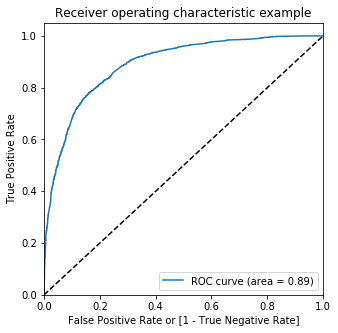

In [407]:
# Drawing Roc curve
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

we see that area is 0.89 which is quite good.

# Finding cutoff optimal point

In [408]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.500548,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.111596,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.326068,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.808399,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.281930,3934,0,1,1,1,0,0,0,0,0,0,0


In [409]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.618275  0.977291  0.397051
0.2   0.2  0.757885  0.920114  0.657921
0.3   0.3  0.795918  0.835766  0.771364
0.4   0.4  0.816636  0.773723  0.843078
0.5   0.5  0.821274  0.713706  0.887556
0.6   0.6  0.803185  0.611517  0.921289
0.7   0.7  0.786797  0.528792  0.945777
0.8   0.8  0.762987  0.431062  0.967516
0.9   0.9  0.712894  0.263990  0.989505


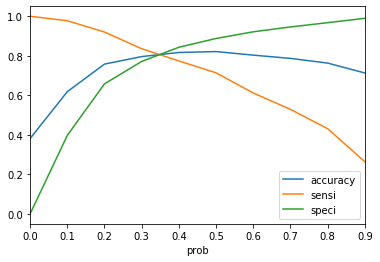

In [410]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
#plt.xlim(0,0.35)
plt.show()

#### Taking optimal cut off as 0.35

In [411]:
# getting "final_predicted" taking 0.35 cut off.
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.500548,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.111596,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.326068,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.808399,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.281930,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [412]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8075139146567718

In [413]:
# confusion matrix for final_predicted.
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3240,  762],
       [ 483, 1983]], dtype=int64)

In [414]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [415]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8041362530413625

In [416]:
# Let us calculate specificity
TN / float(TN+FP)

0.8095952023988006

In [417]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1904047976011994


In [418]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7224043715846995


In [419]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8702659145850121


# Precision and Recall

### Precision

In [420]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7963800904977375

### Recall

In [421]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7137064071370641

In [422]:
# Precision score of model
precision_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.7963800904977375

In [423]:
# Recall score of model
recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.7137064071370641

In [424]:
y_train_pred_final.Convert, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Convert, Length: 6468, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [425]:
#Ploting the precision, recall and threshold
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

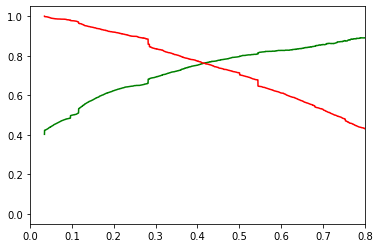

In [426]:
#plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlim(0,0.8)
plt.show()

# Making Predictions on Test Set

In [427]:
#prform scaling on test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MAhaDev\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\MAhaDev\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [428]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Other,What is your current occupation_Other,What is your current occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2376,-0.885371,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7766,-0.777416,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9199,-0.885371,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4359,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [429]:
# add constant
X_test_sm = sm.add_constant(X_test)

C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAhaDev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .

In [430]:
# predict the y values
y_test_pred = res.predict(X_test_sm)

In [431]:
# top 10 value of y_pred on test data
y_test_pred[:10]

4269    0.500603
2376    0.866001
7766    0.816817
9199    0.096385
4359    0.844256
9186    0.555223
1631    0.474798
8963    0.185884
8007    0.022551
5324    0.338737
dtype: float64

In [432]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [433]:
# Let's see the head
y_pred_1.head()

,0
4269,0.500603
2376,0.866001
7766,0.816817
9199,0.096385
4359,0.844256


In [434]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [435]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [436]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [437]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [438]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.500603
1,1,2376,0.866001
2,1,7766,0.816817
3,0,9199,0.096385
4,1,4359,0.844256


In [439]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [440]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Convert_Prob','Converted'], axis=1)

In [441]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Convert_Prob,Converted
0,4269,0.500603,1
1,2376,0.866001,1
2,7766,0.816817,1
3,9199,0.096385,0
4,4359,0.844256,1


In [442]:
# applying cut off
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [443]:
# calculating the score 
y_pred_final['Lead Score']=y_pred_final['Convert_Prob']*100
y_pred_final.head()

,Lead Number,Convert_Prob,Converted,final_predicted,Lead Score
0,4269,0.500603,1,1,50.060315
1,2376,0.866001,1,1,86.600100
2,7766,0.816817,1,1,81.681698
3,9199,0.096385,0,0,9.638506
4,4359,0.844256,1,1,84.425649


In [444]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.803030303030303

In [445]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1351,  326],
       [ 220,  875]], dtype=int64)

In [446]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [447]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7990867579908676

In [448]:
# Let us calculate specificity
TN / float(TN+FP)

0.8056052474657126

# Conclusion

Our Final model having Sensitivity of 80.41%  on Train Set.
and Accuracy score = 80.75 % on Train set

Our Final model having Sensitivity of 79.90%  on Test Set.
and Accuracy score = 80.3 % on Test set

#### Thank you for reading